In [1]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
pos = np.array([[3, 7], [4, 6], [5, 6], [7, 7], [8, 5], [5, 5.2], [7, 5], [6, 3.75], [6, 4], [6, 5], [7, 5], [6, 4.5], [7, 4.5]])
neg = np.array([[4, 5], [5, 5], [6, 3], [7, 4], [9, 4], [5, 4], [5, 4.5], [5, 3.5], [7, 3.5]])

C = 0.1

X = np.ones((pos.shape[0]+neg.shape[0], 2))
X[0:pos.shape[0], :] = pos
X[pos.shape[0]:pos.shape[0]+neg.shape[0], :] = neg

Y = np.ones(pos.shape[0] + neg.shape[0])
Y[0:pos.shape[0]] = 1
Y[pos.shape[0]:pos.shape[0]+neg.shape[0]] = -1

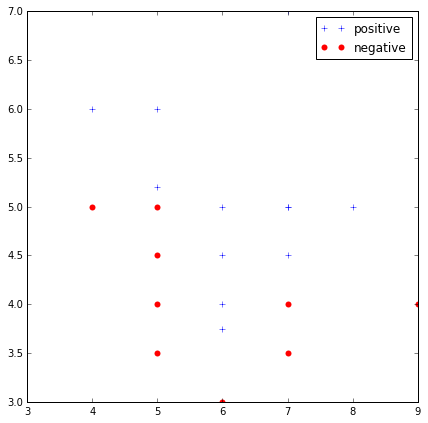

In [4]:
plt.figure(1, figsize = (7, 7))
plt.plot(X[0:pos.shape[0], 0], X[0:pos.shape[0], 1], 'b+', label = 'positive')
plt.plot(X[pos.shape[0]:pos.shape[0] + neg.shape[0], 0], 
         X[pos.shape[0]:pos.shape[0] + neg.shape[0], 1], 'ro', markeredgecolor = 'None', label = 'negative')
plt.legend()
plt.show()

In [5]:
H = np.zeros((pos.shape[0] + neg.shape[0], pos.shape[0] + neg.shape[0]))

for i in range(pos.shape[0] + neg.shape[0]):
    for j in range(pos.shape[0] + neg.shape[0]):
        H[i,j] += np.dot(X[i,:], X[j, :]) * Y[i] * Y[j] * -1
        
f = np.ones(pos.shape[0] + neg.shape[0])

H = -1*H
f = -1*f

A = np.zeros((pos.shape[0] + neg.shape[0] + pos.shape[0] + neg.shape[0], pos.shape[0] + neg.shape[0]))
b = np.zeros(pos.shape[0] + neg.shape[0] + pos.shape[0] + neg.shape[0])

for i in range(pos.shape[0] + neg.shape[0]):
    A[i, i] = -1
    A[i + pos.shape[0] + neg.shape[0], i] = 1
    b[i + pos.shape[0] + neg.shape[0]] = C
    
Aeq = np.zeros((1, pos.shape[0] + neg.shape[0]))
Beq = np.zeros((1, 1))

for i in range(pos.shape[0] + neg.shape[0]):
    Aeq[0, i] = Y[i]

f = matrix(f)
H = matrix(H)
A = matrix(A)
b = matrix(b)
Aeq = matrix(Aeq)
Beq = matrix(Beq)

sol = solvers.qp(H, f, A, b, Aeq, Beq)
alpha = sol['x']

     pcost       dcost       gap    pres   dres
 0: -7.7115e+00 -4.6032e+00  1e+02  1e+01  2e-14
 1: -1.2660e+00 -4.4002e+00  3e+00  2e-02  3e-14
 2: -1.4166e+00 -1.7287e+00  3e-01  2e-03  7e-15
 3: -1.5495e+00 -1.6119e+00  6e-02  4e-04  4e-15
 4: -1.5825e+00 -1.5942e+00  1e-02  6e-05  5e-15
 5: -1.5886e+00 -1.5889e+00  3e-04  1e-06  6e-15
 6: -1.5888e+00 -1.5888e+00  3e-06  1e-08  6e-15
 7: -1.5888e+00 -1.5888e+00  3e-08  1e-10  5e-15
Optimal solution found.


In [6]:
w = np.zeros(pos.shape[1] + 1)
for j in range(pos.shape[1]):
    for i in range(pos.shape[0] + neg.shape[0]):
        w[j] += alpha[i]*Y[i]*X[i,j]
        
wx = np.asarray(np.dot(w[0:pos.shape[1]], X.T))
bs = Y - wx
w[2] = bs[1]

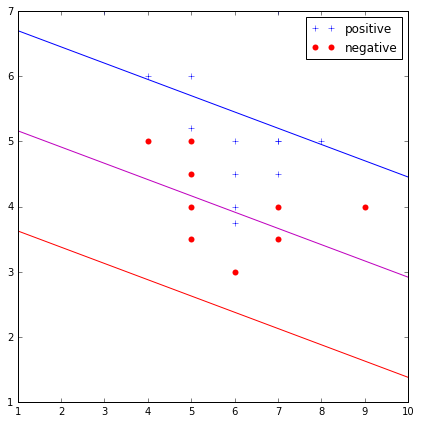

In [7]:
plt.figure(1, figsize = (7, 7))
plt.plot(X[0:pos.shape[0], 0], X[0:pos.shape[0], 1], 'b+', label = 'positive')
plt.plot(X[pos.shape[0]:pos.shape[0] + neg.shape[0], 0], 
         X[pos.shape[0]:pos.shape[0] + neg.shape[0], 1], 'ro', markeredgecolor = 'None', label = 'negative')
plt.legend()

lineX = [1, 10]

lineY0 = [(w[2] + w[0]*lineX[0])/-w[1], (w[2] + w[0]*lineX[1])/-w[1]]
plt.plot(lineX, lineY0, 'm-')

margin = 1 / np.linalg.norm(w[0:2])

lineY1 = [(w[2] + w[0]*lineX[0])/-w[1] + margin, (w[2] + w[0]*lineX[1])/-w[1] + margin]
plt.plot(lineX, lineY1, 'b-')

lineY2 = [(w[2] + w[0]*lineX[0])/-w[1] - margin, (w[2] + w[0]*lineX[1])/-w[1] - margin]
plt.plot(lineX, lineY2, 'r-')

plt.show()